# Visualizing the Difference Between Bagging and Boosting 
In this notebook, I explored the key differences between two powerful ensemble learning techniques:
 Bagging (Bootstrap Aggregating) vs.  Boosting

- 🔹 I created a simple 2D classification dataset using make_classification
- 🔹 Then, I trained both a BaggingClassifier and an AdaBoostClassifier using shallow decision trees
- 🔹 Finally, I visualized the decision boundaries to see how each model behaves.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_classification(
    n_samples=300,         
    n_features=2,          
    n_informative=2,       
    n_redundant=0,         
    n_clusters_per_class=1,
    random_state=42        
)

In [3]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# **BAGGING** 

It is an ensemble learning technique.

## Model Used:

In bagging, the model with low bias and high variance is used just like **fully grown decision tree**.

## Learning:

In bagging, training is done **parallel.** Means all models are trained at once.

## Weightage of Base Learners:

Here the weightage of all models is same. So the answer will be based on what the majority says.

In [5]:
dt = DecisionTreeClassifier()

In [6]:
bagging = BaggingClassifier(estimator=dt, n_estimators=12, max_samples=1.0, n_jobs=-1)

In [7]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=12,
                  n_jobs=-1)

In [8]:
y_pred = bagging.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.9166666666666666

# **BOOSTING**

## Model Used:

In boosting, the model with high bias and low variance is used just like **shallow decision tree**.

## Learning:

In boosting, training is **sequential**. Means models are trained one-by-one.

## Weightage of Base Learners:

Every model have diffrent weightage here. So the answer will be on the basis of what the model with high weightage says.

In [10]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
boosting = AdaBoostClassifier(estimator=dt1, n_estimators=12)

In [12]:
boosting.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=12)

In [13]:
y_pred1 = boosting.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9166666666666666

# Plotting the Results

In [15]:
def plot_decision_boundary(model, X, y, title):
    # Set the size of the plot
    plt.figure(figsize=(8, 6))

    # Step 1: Create meshgrid across your X space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )

    # Step 2: Predict over every point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Step 3: Plot the contour + training points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

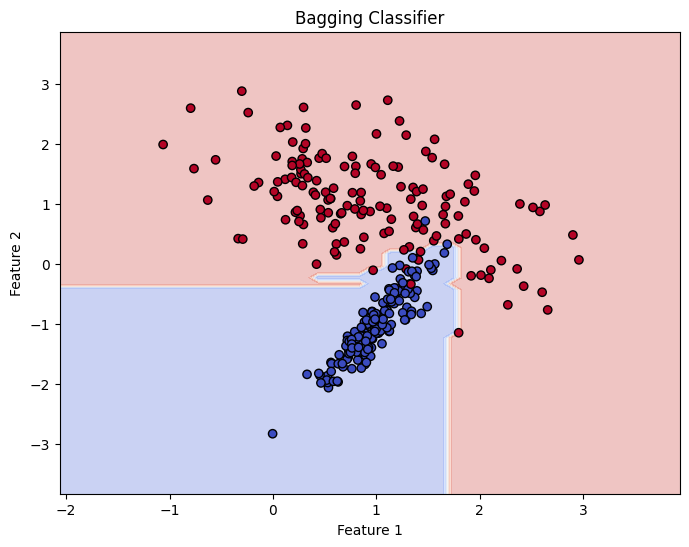

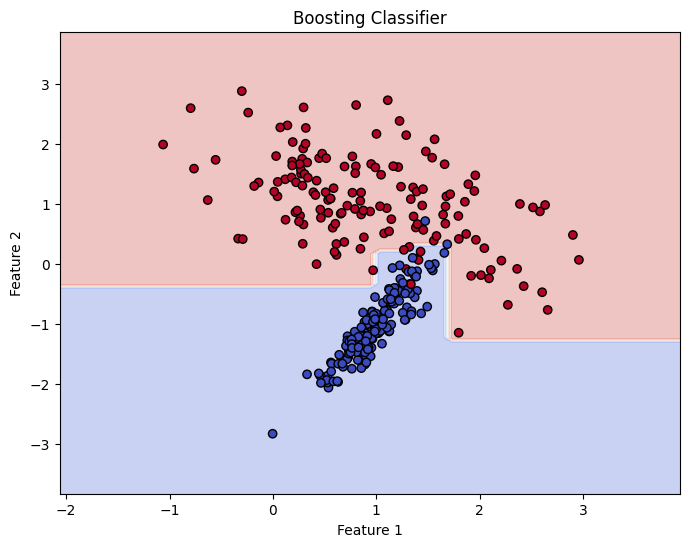

In [16]:
plot_decision_boundary(bagging, X, y, "Bagging Classifier")
plot_decision_boundary(boosting, X, y, "Boosting Classifier")

**THANKS FOR READING!!**